<p align="center">
  <img src="https://i.ytimg.com/vi/Wm8ftqDZUVk/maxresdefault.jpg" alt="FIUBA" width="25%"/>
  </p>
  
# **Trabajo Práctico 2: Críticas Cinematográficas**
### **Grupo**: 11 - Los Pandas 🐼
### **Cuatrimestre**: 2ºC 2023
### **Corrector**: Mateo Suster
### **Integrantes**:
- ### 106861 - Labollita, Francisco
- ### 102312 - Mundani Vegega, Ezequiel
- ###  97263 - Otegui, Matías Iñaki

# Modelo Bayes Naive

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline


In [9]:
reviews = pd.read_csv('train_clean.csv')

## Entrenamiento del modelo

Primero se ve cuál es el mejor tipo de clasificador para el modelo, se prueba con Bernoulli, Multinomial y Gaussiano. Luego se optimizan sus hiperparámetros.

In [10]:
reviews_x = reviews['review_es'].copy()
reviews_y = reviews['sentimiento'].copy()

x_train, x_test, y_train, y_test = train_test_split(reviews_x, reviews_y, test_size=0.30, random_state=0)

In [18]:
classifiers = [
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB(),
]

vectorizers = [
    CountVectorizer(),
    TfidfVectorizer()
]

for v in vectorizers:
    for c in classifiers:
        model = make_pipeline(v, c)

        model.fit(x_train, y_train)

        predicted_categories = model.predict(x_test)

        print("Para", v, ",", c, "el accuracy es", round(accuracy_score(y_test, predicted_categories), 4))

Para CountVectorizer() , MultinomialNB() el accuracy es 0.8369
Para CountVectorizer() , ComplementNB() el accuracy es 0.8369
Para CountVectorizer() , BernoulliNB() el accuracy es 0.8233
Para TfidfVectorizer() , MultinomialNB() el accuracy es 0.8459
Para TfidfVectorizer() , ComplementNB() el accuracy es 0.8461
Para TfidfVectorizer() , BernoulliNB() el accuracy es 0.8233


## Análisis de los mejores modelos entrenados

Dado que obtuvimos dos combinaciones con alto accuracy, analizamos los dos.

### Tfidf Vectorizer y ComplementNB

In [12]:
model = make_pipeline(TfidfVectorizer(), ComplementNB())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Matriz de confusión de los datos de prueba:


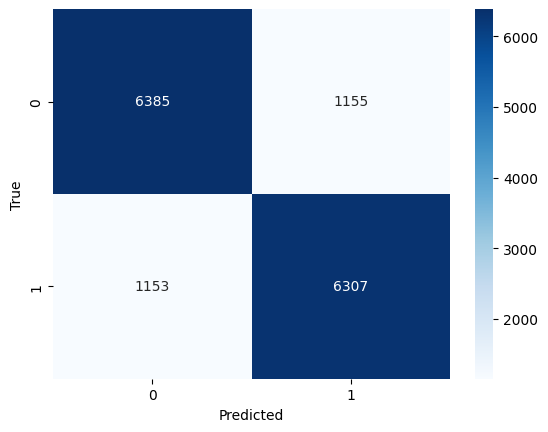

In [13]:
y_train_bool = (y_train == 'positivo').astype(int)
y_train_pred_bool = (y_train_pred == 'positivo').astype(int)
y_test_bool = (y_test == 'positivo').astype(int)
y_test_pred_bool = (y_test_pred == 'positivo').astype(int)

train_score = f1_score(y_train_bool.values, y_train_pred_bool)
test_score = f1_score(y_test_bool.values, y_test_pred_bool)

print("Matriz de confusión de los datos de prueba:")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

In [14]:
accuracy=accuracy_score(y_train_bool, y_train_pred_bool)
recall=recall_score(y_train_bool, y_train_pred_bool)
f1=f1_score(y_train_bool, y_train_pred_bool)
precision=precision_score(y_train_bool, y_train_pred_bool)

print("Cálculo de las métricas en el conjunto de entrenamiento")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

accuracy=accuracy_score(y_test_bool,y_test_pred_bool)
recall=recall_score(y_test_bool,y_test_pred_bool)
f1=f1_score(y_test_bool,y_test_pred_bool)
precision=precision_score(y_test_bool,y_test_pred_bool)

print("\nCálculo de las métricas en el conjunto de pruebas")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

Cálculo de las métricas en el conjunto de entrenamiento
Accuracy:  0.909
Recall:  0.905
Precision:  0.913
F1 score:  0.909

Cálculo de las métricas en el conjunto de pruebas
Accuracy:  0.846
Recall:  0.845
Precision:  0.845
F1 score:  0.845


### Tfidf Vectorizer y MultinomialNB

In [15]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


Matriz de confusión de los datos de prueba:


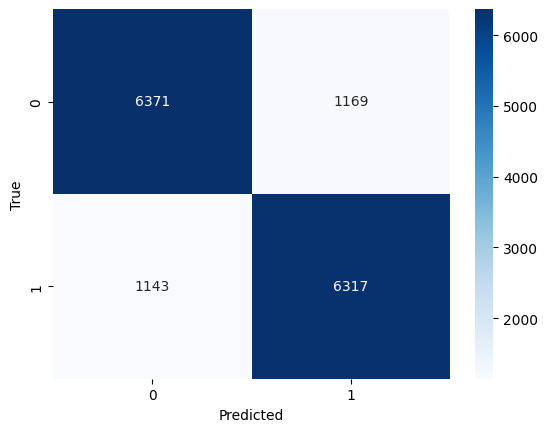

In [16]:
y_train_bool = (y_train == 'positivo').astype(int)
y_train_pred_bool = (y_train_pred == 'positivo').astype(int)
y_test_bool = (y_test == 'positivo').astype(int)
y_test_pred_bool = (y_test_pred == 'positivo').astype(int)

train_score = f1_score(y_train_bool.values, y_train_pred_bool)
test_score = f1_score(y_test_bool.values, y_test_pred_bool)

print("Matriz de confusión de los datos de prueba:")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

In [17]:
accuracy=accuracy_score(y_train_bool, y_train_pred_bool)
recall=recall_score(y_train_bool, y_train_pred_bool)
f1=f1_score(y_train_bool, y_train_pred_bool)
precision=precision_score(y_train_bool, y_train_pred_bool)

print("Cálculo de las métricas en el conjunto de entrenamiento")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

accuracy=accuracy_score(y_test_bool,y_test_pred_bool)
recall=recall_score(y_test_bool,y_test_pred_bool)
f1=f1_score(y_test_bool,y_test_pred_bool)
precision=precision_score(y_test_bool,y_test_pred_bool)

print("\nCálculo de las métricas en el conjunto de pruebas")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

Cálculo de las métricas en el conjunto de entrenamiento
Accuracy:  0.909
Recall:  0.906
Precision:  0.912
F1 score:  0.909

Cálculo de las métricas en el conjunto de pruebas
Accuracy:  0.846
Recall:  0.847
Precision:  0.844
F1 score:  0.845


## Grid Search

In [8]:
model = Pipeline([("tfidf", TfidfVectorizer()), ("mnb", MultinomialNB())])

params_grid = {
        'tfidf__ngram_range': [(1,1), (1,2), (2,2)],
        'tfidf__max_features': [1000, 10000, 100000],
        'mnb__alpha': [0.001, 0.01, 0.1],
}

scorer_fn = make_scorer(f1_score, pos_label='positivo')
kfoldcv = StratifiedKFold(n_splits=5)

gridcv = GridSearchCV(estimator=model,
                      param_grid = params_grid,
                      scoring=scorer_fn,
                      cv=kfoldcv
                      )

model = gridcv.fit(x_train,y_train)

y_pred = model.predict(x_test)
score = f1_score(y_test, y_pred, pos_label='positivo')
print("Parámetros:", gridcv.best_params_, "\nF1 score: ", round(score, 3))



Parámetros: {'mnb__alpha': 0.1, 'tfidf__max_features': 100000, 'tfidf__ngram_range': (1, 2)} 
F1 score:  0.862


Matriz de confusión de los datos de prueba:


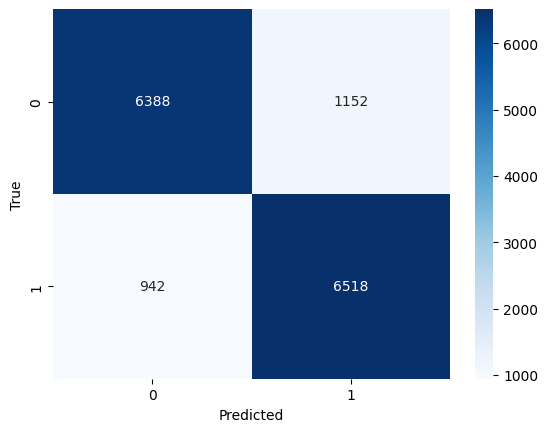

In [9]:
y_train_pred = model.predict(x_train)

y_train_bool = (y_train == 'positivo').astype(int)
y_train_pred_bool = (y_train_pred == 'positivo').astype(int)
y_test_bool = (y_test == 'positivo').astype(int)
y_test_pred_bool = (y_pred == 'positivo').astype(int)

train_score = f1_score(y_train_bool.values, y_train_pred_bool)
test_score = f1_score(y_test_bool.values, y_test_pred_bool)

print("Matriz de confusión de los datos de prueba:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

In [10]:
accuracy=accuracy_score(y_train_bool, y_train_pred_bool)
recall=recall_score(y_train_bool, y_train_pred_bool)
f1=f1_score(y_train_bool, y_train_pred_bool)
precision=precision_score(y_train_bool, y_train_pred_bool)

print("Cálculo de las métricas en el conjunto de entrenamiento")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

accuracy=accuracy_score(y_test_bool,y_test_pred_bool)
recall=recall_score(y_test_bool,y_test_pred_bool)
f1=f1_score(y_test_bool,y_test_pred_bool)
precision=precision_score(y_test_bool,y_test_pred_bool)

print("\nCálculo de las métricas en el conjunto de pruebas")
print("Accuracy: ", round(accuracy, 3))
print("Recall: ", round(recall, 3))
print("Precision: ", round(precision, 3))
print("F1 score: ", round(f1, 3))

Cálculo de las métricas en el conjunto de entrenamiento
Accuracy:  0.943
Recall:  0.946
Precision:  0.941
F1 score:  0.944

Cálculo de las métricas en el conjunto de pruebas
Accuracy:  0.86
Recall:  0.874
Precision:  0.85
F1 score:  0.862


## Predicción del conjunto test

In [11]:
test = pd.read_csv('test_clean.csv')

predictions = pd.DataFrame()
predictions['ID'] = test['ID'].values
predictions['sentimiento'] = model.predict(test['review_es'])

predictions.to_csv('sample_solution.csv', index=False)

## Exporación del modelo obtenido

In [ ]:
pickle.dump(model, open("bayes_clean.pkl", "wb"))